In [1]:
pip install requests pandas


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os

os.makedirs("data/raw", exist_ok=True)
os.makedirs("data/processed", exist_ok=True)
os.makedirs("src", exist_ok=True)

In [2]:
"""
get_data.py
Download historical cryptocurrency data using CoinGecko API
and save raw JSON files into data/raw/
"""

import os
import requests
import json
from datetime import datetime

RAW_DIR = os.path.join("data", "raw")
os.makedirs(RAW_DIR, exist_ok=True)

# Choose your cryptocurrencies
COINS = ["bitcoin", "ethereum", "solana"]
N_DAYS = 365   # last 1 year

def fetch_market_data(coin_id: str, days: int = N_DAYS) -> dict:
    """
    Fetch historical market data for a given cryptocurrency from CoinGecko.
    Returns JSON as Python dictionary.
    """
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart"
    params = {"vs_currency": "usd", "days": days}

    response = requests.get(url, params=params, timeout=10)
    response.raise_for_status()  # Raise error if API request fails

    return response.json()

def save_raw_json(data: dict, coin_id: str) -> None:
    """
    Save raw JSON data into data/raw folder.
    """

    file_path = os.path.join(RAW_DIR, f"{coin_id}_raw.json")
    with open(file_path, "w", encoding="utf-8") as f:
        json.dump(data, f, indent=2)

    print(f"Saved: {file_path}")

def run():
    """
    Main function to download raw crypto data and save to JSON files.
    """
    for coin in COINS:
        print(f"Fetching data for {coin}...")
        data = fetch_market_data(coin)
        save_raw_json(data, coin)

    print("Data collection complete.")

if __name__ == "__main__":
    run()

Fetching data for bitcoin...
Saved: data/raw/bitcoin_raw.json
Fetching data for ethereum...
Saved: data/raw/ethereum_raw.json
Fetching data for solana...
Saved: data/raw/solana_raw.json
Data collection complete.


In [6]:
! python src/get_data.py

Fetching data for bitcoin...
Saved: data/raw/bitcoin_raw.json
Fetching data for ethereum...
Saved: data/raw/ethereum_raw.json
Fetching data for solana...
Saved: data/raw/solana_raw.json
Data collection complete.


In [8]:
import pandas as pd

df = pd.read_csv("data/processed/crypto_daily_cleaned.csv")
df.head()

,date,coin,price,market_cap,volume,return,vol_7d,vol_30d
0,2024-11-16,bitcoin,90947.975094,1.799276e+12,8.438249e+10,NaN,NaN,NaN
1,2024-11-17,bitcoin,90606.454894,1.790416e+12,4.925517e+10,-0.003755,NaN,NaN
2,2024-11-18,bitcoin,89841.471941,1.776887e+12,4.855608e+10,-0.008443,NaN,NaN
3,2024-11-19,bitcoin,90534.624597,1.790918e+12,7.739172e+10,0.007715,NaN,NaN
4,2024-11-20,bitcoin,92251.652407,1.825195e+12,8.049323e+10,0.018965,NaN,NaN


In [9]:
import os
os.makedirs("results", exist_ok=True)

In [15]:
! python src/visualize_results.py

python: can't open file '/Users/peggy/Desktop/pyhton LAB/src/visualize_results.py': [Errno 2] No such file or directory


price_time_series.png


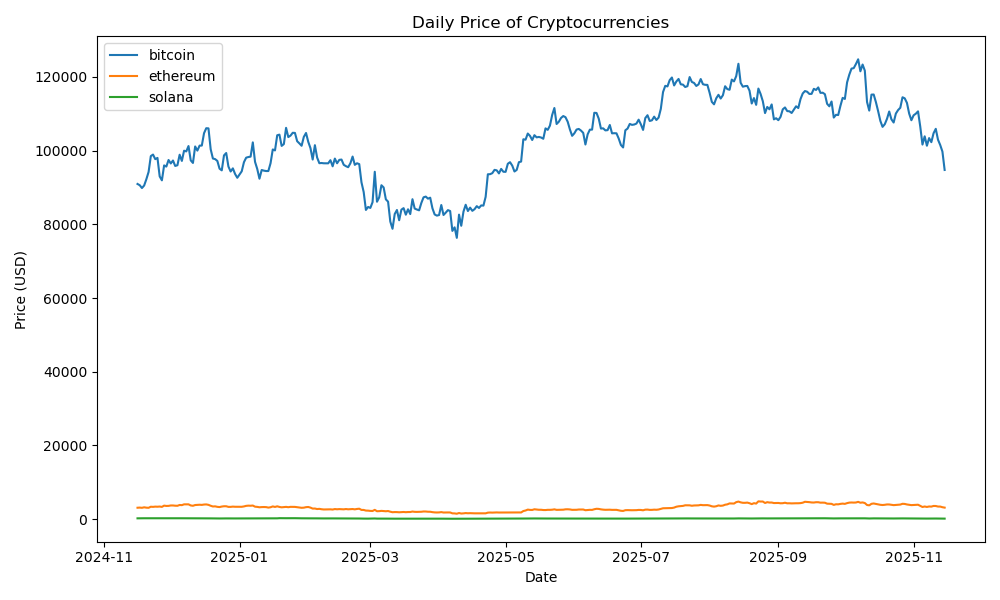

volatility_time_series.png


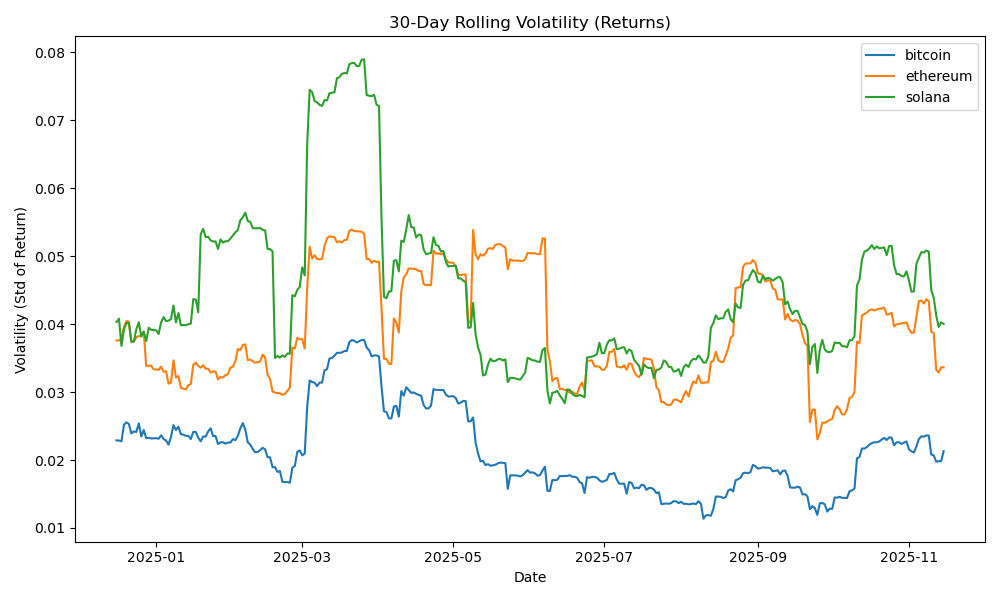

volume_vs_volatility.png


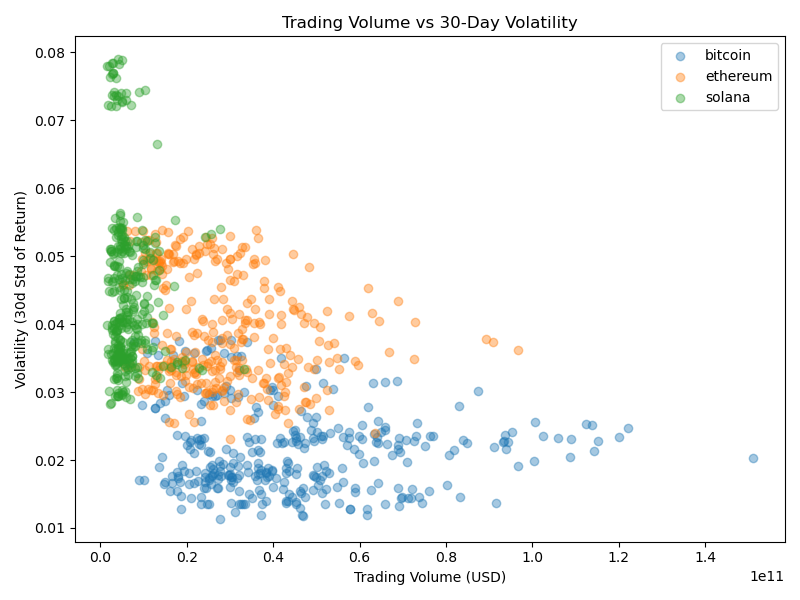

price_correlation_heatmap.png


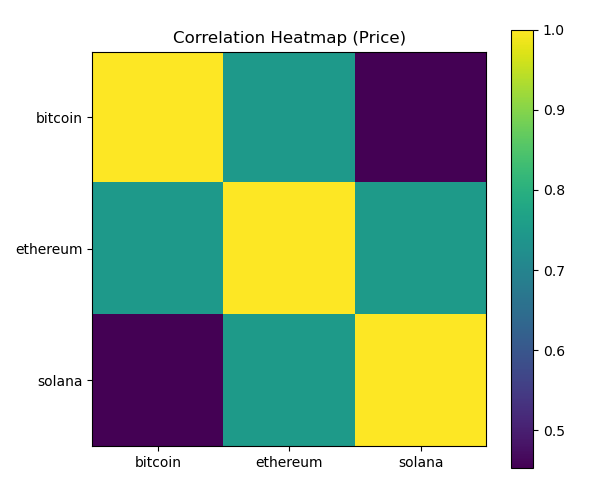

In [16]:
from IPython.display import Image, display

files = [
    "price_time_series.png",
    "volatility_time_series.png",
    "volume_vs_volatility.png",
    "price_correlation_heatmap.png",
]

for f in files:
    print(f)
    display(Image(filename=f"results/{f}"))